In [4]:
# import installed libraries
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from scipy.fftpack import fft, fftshift

In [8]:
# read in sound file
samplerate, data = wavfile.read('hbd_slow_speed.wav')

# define sound metadata
data_size = data.shape[0]
song_length_seconds = data_size/samplerate

# print sound metadata
print("Data size:", data_size)
print("Sample rate:", samplerate)
print("Song length (seconds):", song_length_seconds, "seconds")

Data size: 1220608
Sample rate: 48000
Song length (seconds): 25.429333333333332 seconds


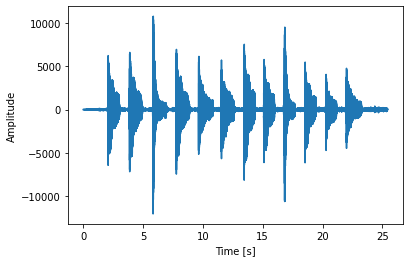

In [9]:
# define domain in seconds
time_domain = np.linspace(0, song_length_seconds, data_size)

# plot sound wave
plt.plot(time_domain, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

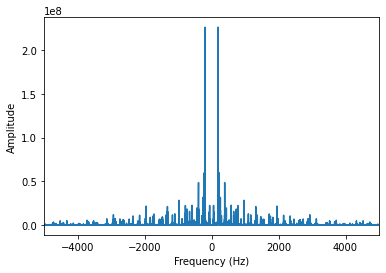

In [30]:
# define frequency domain
freq_domain = np.linspace(-samplerate/2,samplerate/2,data_size)

# fourier transform
fourier_data = abs(fft(data))
fourier_data_shiftnorm = fftshift(fourier_data)

# plotting spectral content of sound wave
plt.xlim([-5000, 5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_domain, fourier_data_shiftnorm)
plt.show()

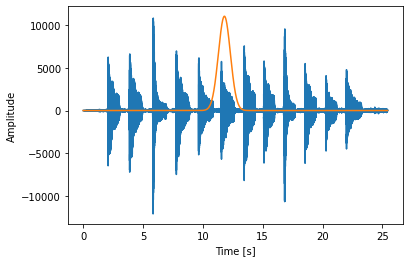

In [31]:
# define gaussian filter
gaussian = 11000*np.exp(-2*np.power(time_domain - 11.8, 2))

# plot signal with gaussian
plt.plot(time_domain, data)
plt.plot(time_domain, gaussian)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

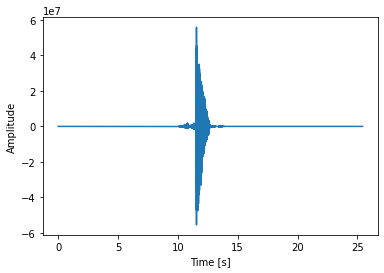

In [33]:
# plot signal with gaussian
plt.plot(time_domain, gaussian*data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

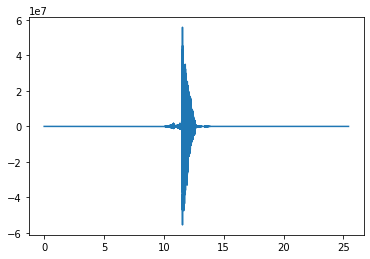

In [40]:
# apply Gabor transform across sliding window
for i in [2.2, 4.25, 6, 8, 10, 11.8]:
    clear_output(wait=True)
    gaussian = 11000*np.exp(-2*np.power(time_domain - i, 2))
    plt.plot(time_domain, data*gaussian)
    plt.pause(0.2)

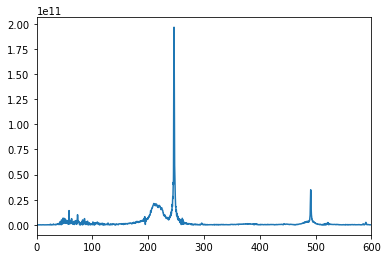

In [113]:
results = []

for i in [2.2, 4.25, 6, 8, 10, 11.8]:
    clear_output(wait=True)
    plt.xlim([0, 600])
    gaussian = 11000*np.exp(-2*np.power(time_domain - i, 2))

    gaussian_filtered = data*gaussian

    fourier_data = abs(fft(gaussian_filtered))
    fourier_data_shiftnorm = fftshift(fourier_data)

    results.append(fourier_data_shiftnorm)
    
    plt.plot(freq_domain, fourier_data_shiftnorm)
    plt.pause(1)

In [120]:
# from: https://www.johndcook.com/blog/2016/02/10/musical-pitch-notation/
from math import log2, pow

C0 = 440*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(freq):
    h = round(12*log2(freq/C0))
    n = h % 12
    return name[n]

In [121]:
for i in range(len(results)):
    frequency = abs(freq_domain[results[i].argmax()])
    print(round(frequency,2), ": ", pitch(frequency))

194.44 :  G
194.48 :  G
219.92 :  A
194.44 :  G
261.69 :  C
246.27 :  B


In [122]:
print(440*pow(2, -4.75))

16.351597831287414
